In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline
datadir = "../../data"

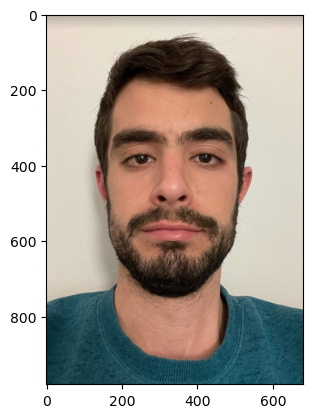

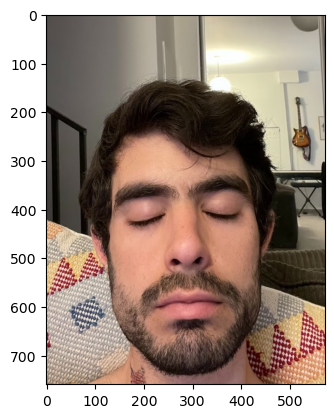

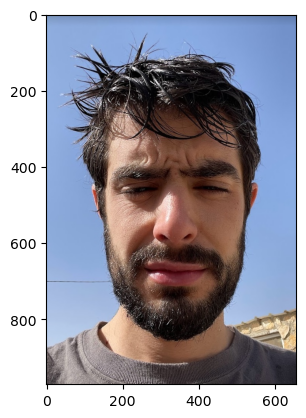

In [78]:
opened = cv2.cvtColor(cv2.imread(datadir+'/open/IMG_1314.jpg'), cv2.COLOR_BGR2RGB)
opened_gray = cv2.cvtColor(cv2.imread(datadir+'/open/IMG_1314.jpg'), cv2.COLOR_BGR2GRAY)
plt.imshow(opened)
plt.show()


closed1 = cv2.cvtColor(cv2.imread(datadir+'/closed/IMG_1008.jpg'), cv2.COLOR_BGR2RGB) 
closed1_gray = cv2.cvtColor(cv2.imread(datadir+'/closed/IMG_1008.jpg'), cv2.COLOR_BGR2GRAY)
closed2 = cv2.cvtColor(cv2.imread(datadir+'/closed/IMG_1123.jpg'), cv2.COLOR_BGR2RGB)
closed2_gray = cv2.cvtColor(cv2.imread(datadir+'/closed/IMG_1123.jpg'), cv2.COLOR_BGR2GRAY)
plt.imshow(closed1)
plt.show()
plt.imshow(closed2)
plt.show()

In [72]:
left_eye_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_lefteye_2splits.xml')
right_eye_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_righteye_2splits.xml')
assert not left_eye_classifier.empty()
assert not right_eye_classifier.empty()

In [73]:
def non_max_suppression(boxes):
    if len(boxes) == 0:
        return []

    boxes = sorted(boxes, key=lambda x: x[2] * x[3], reverse=True)
    keep = [0]

    for i in range(1, len(boxes)):
        overlap = (max(0, min(boxes[keep[-1]][0] + boxes[keep[-1]][2], boxes[i][0] + boxes[i][2]) - max(boxes[keep[-1]][0], boxes[i][0])) *
                   max(0, min(boxes[keep[-1]][1] + boxes[keep[-1]][3], boxes[i][1] + boxes[i][3]) - max(boxes[keep[-1]][1], boxes[i][1]))) / float(boxes[keep[-1]][2] * boxes[keep[-1]][3])

        if overlap == 0:
            keep.append(i)

    return [boxes[i] for i in keep]

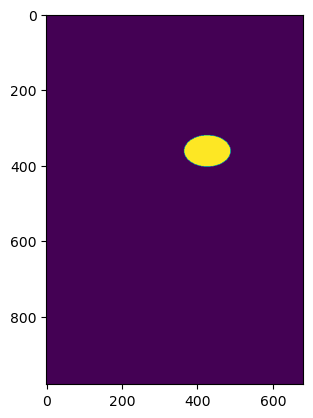

In [74]:
left_eye = left_eye_classifier.detectMultiScale(opened_gray)
x, y, w, h = max(non_max_suppression(left_eye), key=lambda x: x[0])
left_eye_mask = np.zeros(opened_gray.shape[:2], dtype=np.uint8)
cx, cy = x + w/2, y + h/2
major_axis = w / 2
minor_axis = h / 3    
cv2.ellipse(left_eye_mask, (int(cx), int(cy)), (int(major_axis), int(minor_axis)), 0, 0, 360, 255, -1)
plt.imshow(left_eye_mask)
plt.show()

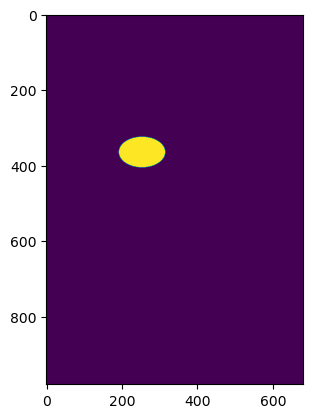

In [69]:
right_eye = right_eye_classifier.detectMultiScale(opened_gray)
x, y, w, h = min(non_max_suppression(right_eye), key=lambda x: x[0])
right_eye_mask = np.zeros(opened_gray.shape[:2], dtype=np.uint8)
cx, cy = x + w/2, y + h/2
major_axis = w / 2
minor_axis = h / 3    
cv2.ellipse(right_eye_mask, (int(cx), int(cy)), (int(major_axis), int(minor_axis)), 0, 0, 360, 255, -1)
plt.imshow(right_eye_mask)
plt.show()

In [84]:
left_eye = left_eye_classifier.detectMultiScale(closed1_gray)
x, y, w, h = max(non_max_suppression(left_eye), key=lambda x: x[0])
left_eye_center = int(x + w/2), int(y + h/2)
left_eye_center

(357, 390)

In [96]:
right_eye = right_eye_classifier.detectMultiScale(closed1_gray)
x, y, w, h = min(non_max_suppression(right_eye), key=lambda x: x[0])
right_eye_center = int(x + w/2), int(y-5 + h/2)
right_eye_center

(212, 399)

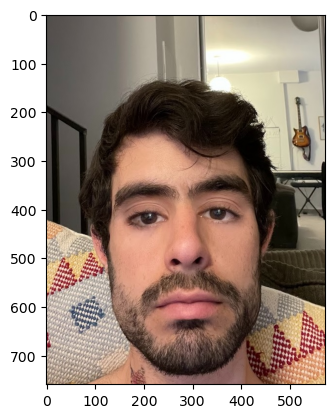

In [97]:
blend = cv2.seamlessClone(opened, closed1, left_eye_mask, left_eye_center, cv2.NORMAL_CLONE)
blend = cv2.seamlessClone(opened, blend, right_eye_mask, right_eye_center, cv2.NORMAL_CLONE)
plt.imshow(blend)
plt.show()